In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer
from matplotlib import pyplot as plt

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [171]:
def generate_ngon(n, R):
    res = []
    for i in range(n):
        angle = np.pi/2 + 2 * i*  np.pi / n
        x = np.cos(angle) * R
        y = np.sin(angle) * R
        res.append((x, y))
    return res

In [180]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(4, 1), (2, 2), (3, 5), (4, 7), (6, 6), (3, 9), (6, 8), (9, 10), (7, 4), (4, 3), (5, 0)]
polygon_example_colors = [4,4,4,4,3,0,2,0,4,4,1]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]

christmas_tree = [(24.93283677107207, 0.06497750615397713),
 (25.289343009931248, 0.1583481877599528),
 (25.0134750870045, 0.2602071131482898),
 (25.289343009931248, 0.3535777947542655),
 (25.0134750870045, 0.4427043544690604),
 (25.24690179101944, 0.5615397674221203),
 (24.915860283507346, 0.6846193022663609),
 (24.70789831083949, 0.5445632798573975),
 (24.877663186486718, 0.4257278669043375),
 (24.746095407860118, 0.33235718529836195),
 (24.89463967405144, 0.2517188693659284),
 (24.716386554621852, 0.1371275783040492)]

polygon_wyklad = [(8.230414746543778, 0.6221198156682031),
 (7.622119815668203, 8.493087557603689),
 (6.774193548387096, 9.13824884792627),
 (6.6082949308755765, 6.281105990783412),
 (5.299539170506913, 5.433179723502306),
 (3.456221198156682, 4.9539170506912455),
 (5.059907834101383, 3.755760368663596),
 (3.6036866359447006, 2.1152073732718906)]

polygon_weird = [(4.377880184331797, 0.32718894009216637),
 (6.331797235023041, 3.2211981566820285),
 (7.898617511520737, 3.6635944700460845),
 (9.133640552995391, 3.8479262672811076),
 (8.986175115207374, 4.972350230414748),
 (7.511520737327189, 5.322580645161292),
 (7.732718894009217, 8.050691244239633),
 (7.105990783410137, 8.75115207373272),
 (8.32258064516129, 9.414746543778804),
 (3.8801843317972353, 9.359447004608297),
 (4.6728110599078345, 7.755760368663596),
 (2.7004608294930876, 5.967741935483873),
 (5.078341013824884, 4.161290322580647),
 (0.9861751152073732, 3.7373271889400934),
 (0.3963133640552998, 3.110599078341015),
 (2.2396313364055302, 2.207373271889402),
 (1.133640552995392, 1.7834101382488485),
 (3.069124423963134, 1.4884792626728116),
 (0.9493087557603688, 1.1198156682027658),
 (2.9032258064516134, 0.6221198156682031)]
       
polygon_5 = [(7.105990783410137, 1.1013824884792631),
 (8.87557603686636, 4.658986175115209),
 (6.23963133640553, 7.202764976958527),
 (4.08294930875576, 4.658986175115209),
 (5.1336405529953915, 1.6359447004608303)]


polygon_weird_2 = [(4.046082949308756, 0.8064516129032262),
 (8.396313364055299, 0.8617511520737333),
 (6.958525345622119, 2.3179723502304155),
 (5.502304147465438, 3.31336405529954),
 (5.5207373271889395, 4.34562211981567),
 (7.105990783410137, 5.359447004608296),
 (9.11520737327189, 6.447004608294932),
 (8.746543778801843, 7.405529953917053),
 (3.769585253456221, 7.737327188940094),
 (3.695852534562212, 5.322580645161292),
 (3.769585253456221, 4.161290322580647),
 (3.7511520737327193, 3.5345622119815685),
 (3.566820276497696, 2.2626728110599084),
 (3.769585253456221, 1.5990783410138254)]

polygon_weird_3 = [(2.129032258064516, 0.788018433179724),
 (3.972350230414747, 0.8064516129032262),
 (5.76036866359447, 1.3963133640553),
 (7.382488479262673, 2.0046082949308763),
 (8.267281105990783, 3.0737327188940107),
 (6.663594470046082, 3.4792626728110614),
 (7.769585253456221, 4.142857142857144),
 (8.248847926267281, 6.1152073732718915),
 (6.88479262672811, 6.74193548387097),
 (8.543778801843319, 7.995391705069126),
 (4.56221198156682, 9.488479262672813),
 (2.534562211981567, 8.695852534562214),
 (4.1566820276497705, 7.663594470046085),
 (3.640552995391705, 6.262672811059909),
 (1.1705069124423964, 5.764976958525347),
 (0.8755760368663594, 4.253456221198158),
 (2.3870967741935485, 2.2442396313364066),
 (0.709677419354839, 1.4516129032258072)]

polygon_50 = generate_ngon(50, 100)

pols = [polygon_5, christmas_tree, polygon_weird, polygon_weird_2, polygon_weird_3, polygon_50]
names = ["polygon_5", "christmas_tree", "polygon_weird", "polygon_weird_2", "polygon_weird_3", "polygon_50"]

In [72]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [179]:
def draw_and_save_polygon(polygon, filename):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()
    vis.save(filename)

In [73]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [74]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


In [182]:
def draw_and_save_polygon_tri(polygon,tri, filename):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()
    vis.save(filename+"-tri")

In [75]:
def direction(a, b, c):
    return (b[0] - a[0]) * (c[1] - a[1]) - ((c[0] - a[0]) * (b[1] - a[1]))

def distance_squared(point1, point2):
    return (point1[0] - point2[0])**2 + (point1[1] - point2[1])**2

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

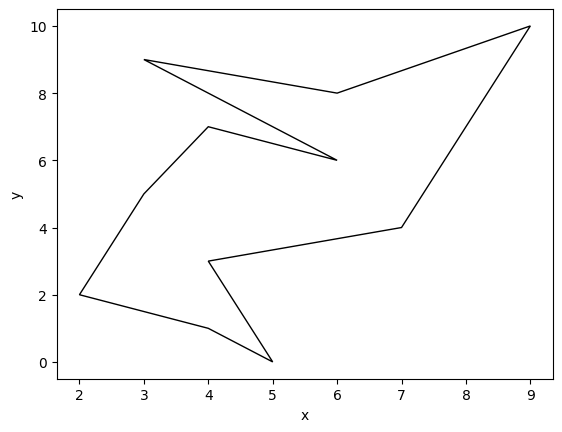

In [76]:
draw_polygon(polygon_example_2)

Do tego celu wygeneruj wielokąt.

In [77]:
polygon = polygon_example_2

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [78]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    for i in range(0, len(polygon)-1):
        if connective_or_separative(polygon[i-1], polygon[i], polygon[i+1]):
            return False
    
    if connective_or_separative(polygon[-2], polygon[-1], polygon[0]):
        return False
    return True

def connective_or_separative(a, b, c, eps = 10 ** (-12)):
    determinant = direction(a, b, c)
    if a[1] > b[1] and c[1] > b[1] and determinant < -eps:
        return True
    elif a[1] < b[1] and c[1] < b[1] and determinant < -eps:
        return True
    return False
    
def is_less(polygon, i, j, ind):
    return ((polygon[i][ind] < polygon[j][ind]) or (polygon[i][ind] == polygon[j][ind] and i < j))

In [79]:
def make_list_of_nums(str):
    res = str.split()
    res = [float(i) for i in res]
    out = []
    for i in range(0, len(res), 2):
        out.append((res[i], res[i+1]))
    return out

Przeprowadź test poprawności powyższej funkcji.

In [80]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.001s


Sprawdź monotoniczność swojego wielokątu.

In [81]:
is_y_monotonic(polygon)

False

***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

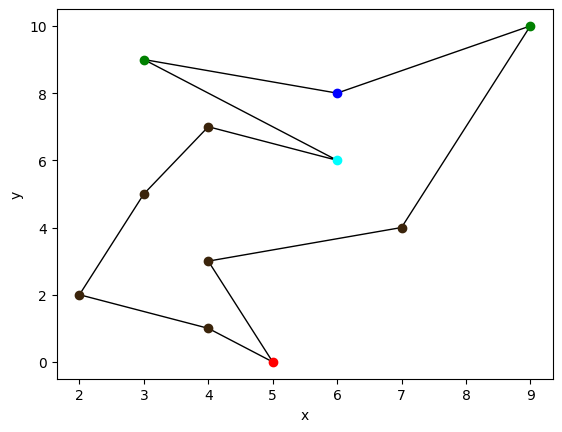

In [82]:
draw_polygon_colors(polygon,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [83]:
def color_vertex(polygon):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    eps = 0
    n = len(polygon)
    res = []

    for i in range(n):
        a = polygon[i-1]
        b = polygon[i]
        c = polygon[(i+1)%n]
        if a[1] < b[1] and c[1] < b[1]:

            # starting
            if direction(a, b, c) > eps:
                res.append(0)

            # separative
            elif direction(a, b, c) < -eps:
                res.append(3)

        # closing or connective or correct
        elif a[1] > b[1] and c[1] > b[1]:
            # closing
            if direction(a, b, c) > eps:
                res.append(1)
            # connective
            elif direction(a, b, c) < -eps:
                res.append(2)

    # correct
        else:
            res.append(4)

    
    return res

def get_angle(a,b,c):
    return

Przeprowadź test poprawności powyższej funkcji. 

In [84]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.002s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

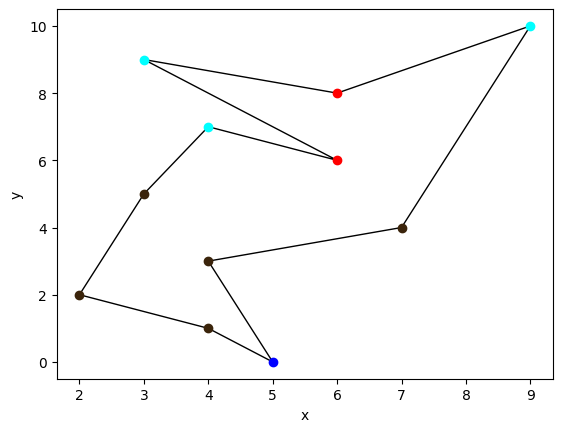

In [85]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [86]:
def separate_chains(polygon):
    n = len(polygon)
    chain = [False for i in range(n)]
    
    ind_y = polygon.index(max(polygon, key = lambda point: point[1]))
    chain[ind_y] = True
    c = 0
    while c < n:
        if polygon[(ind_y + c)%n][1] <= polygon[(ind_y-1 + c) % n][1]:
            chain[(ind_y + c) % n] = True
        c+=1

    
    return chain

In [87]:
def neighbours(a, b, list):
    a_index = list.index(a)
    b_index = list.index(b)
    if abs(a_index - b_index) == 1:
        return True
    elif abs(a_index - b_index) == len(list) - 1:
        return True
    return False

In [95]:
def triangulation(polygon):
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """

    if not is_y_monotonic(polygon):

        return []
    
    res = []
    n = len(polygon)
    eps = 0

    s_polygon = sorted(polygon, key = lambda x: x[1], reverse=True)
    stack = [s_polygon[0], s_polygon[1]]
    chain = separate_chains(polygon)

    for i in range(2, n-1):
        if chain[polygon.index(stack[-1])] == chain[polygon.index(s_polygon[i])]:
            stack.append(s_polygon[i])

            while len(stack) > 2:
                if chain[polygon.index(s_polygon[i])] and direction(stack[-3], stack[-2], stack[-1]) < eps:
                    break
                if not chain[polygon.index(s_polygon[i])] and direction(stack[-3], stack[-2], stack[-1]) > eps:
                    break
                if not neighbours(stack[-1], stack[-3], polygon): res.append([stack[-1], stack[-3]])

                p = stack.pop()
                stack.pop()
                stack.append(p)
        
        else:
            while len(stack) > 0:
                p = stack.pop()
                if neighbours(p, s_polygon[i], polygon): continue
                res.append([p, s_polygon[i]])

            stack.append(s_polygon[i-1])
            stack.append(s_polygon[i])
    
    for i in range(1, len(stack) -1):
        res.append([s_polygon[-1], stack[i]])

    # res = [[polygon.index(r[0]), polygon.index(r[1])] for r in res]
    return res

Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [89]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.002s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

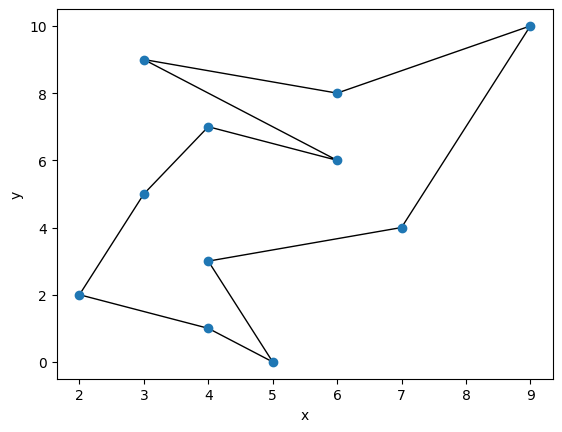

In [90]:
tri = triangulation(polygon_example_2)
draw_polygon_tri(polygon,tri)

In [123]:
def draw_app(n):
    %matplotlib tk
    clicks = []

    def onclick(event):
        x = event.xdata
        y = event.ydata
        if x is not None and y is not None:
            clicks.append((x, y))

    fig, ax = plt.subplots(figsize = (7,7))
    plt.grid(True)
    plt.axis('equal')
    plt.xlim(0, 10)
    plt.ylim(0, 10)
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    while len(clicks) == 0:
        plt.pause(0.1)
    while len(clicks) == 1:
        plt.pause(0.1)
        plt.scatter(clicks[-1][0], clicks[-1][1], marker="o", color="red")

    while len(clicks)<n:
        plt.pause(0.1)
        plt.scatter(clicks[-1][0], clicks[-1][1], marker='o', color="red")
        plt.plot((clicks[-1][0], clicks[-2][0]), (clicks[-1][1], clicks[-2][1]),color="blue")


    plt.plot((clicks[-1][0], clicks[0][0]), (clicks[-1][1], clicks[0][1]),color="blue")
    plt.pause(1)
    plt.close('all')
    %matplotlib inline
    return clicks

In [172]:
# pols = draw_app(18)

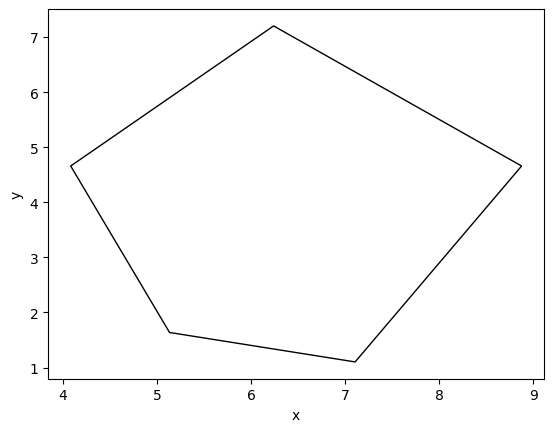

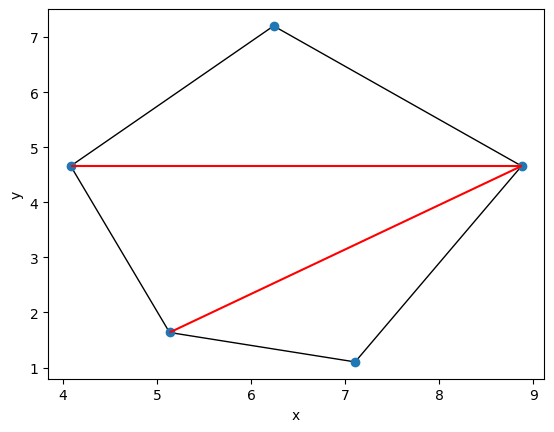

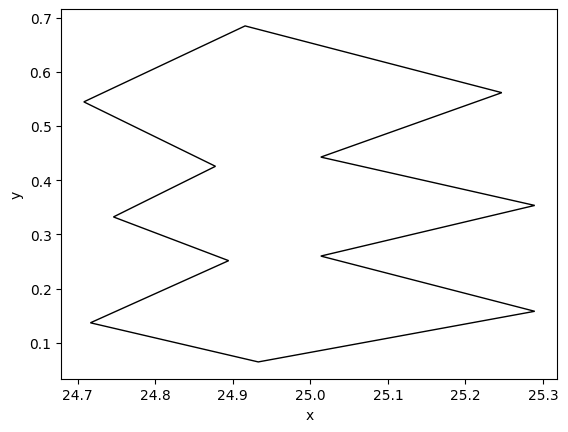

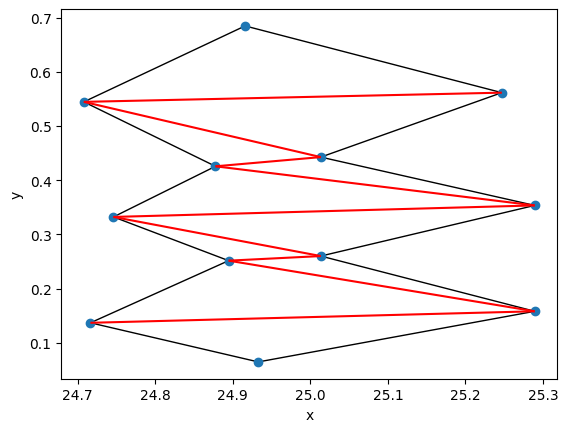

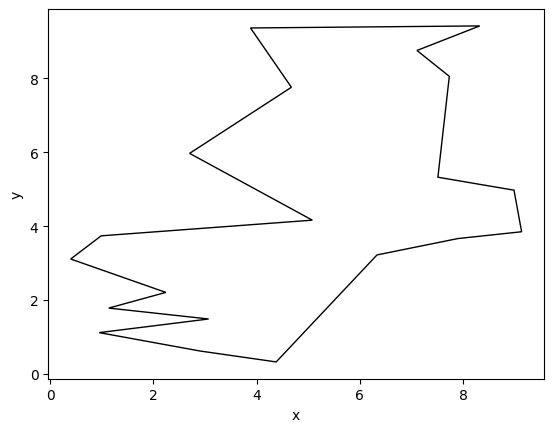

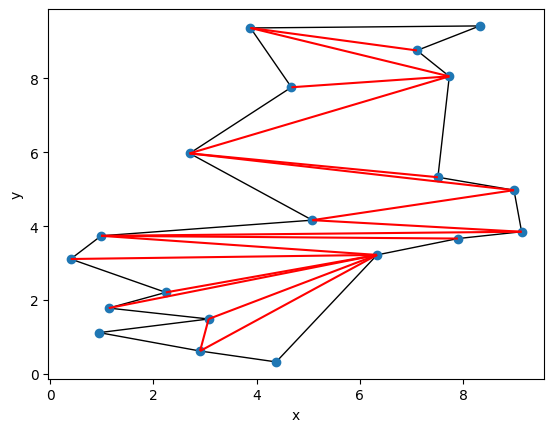

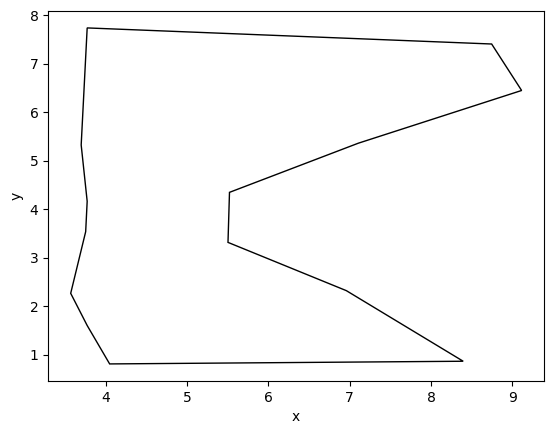

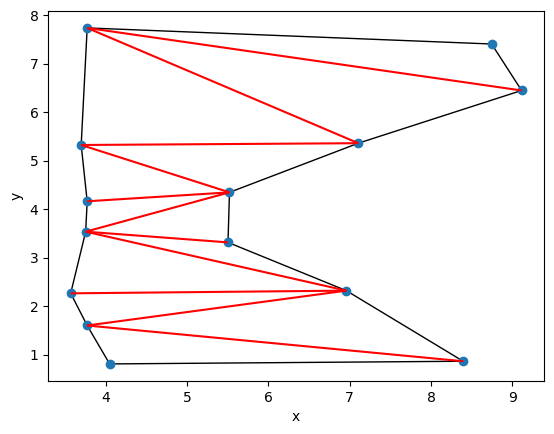

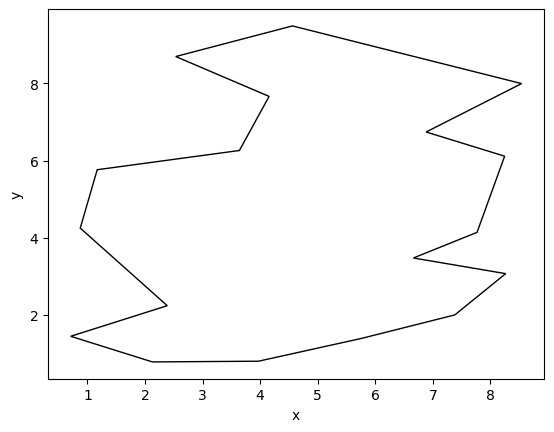

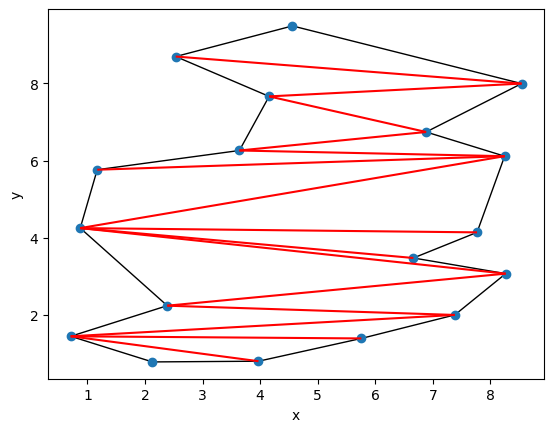

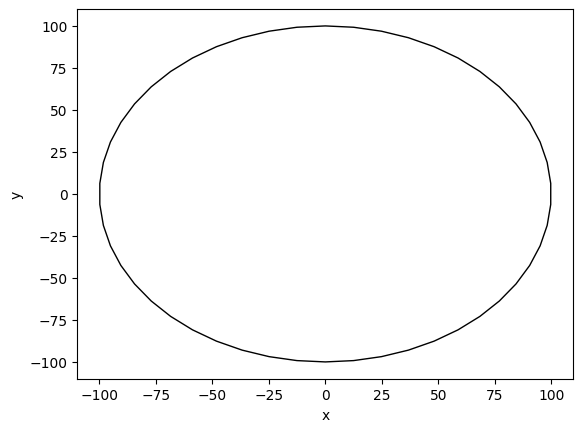

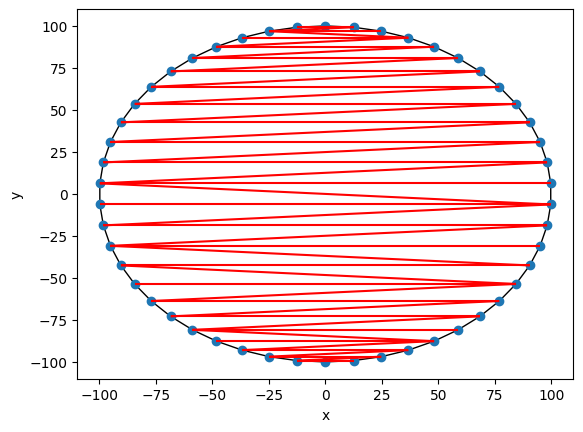

In [183]:
for i in range(len(pols)):
    draw_and_save_polygon(pols[i], names[i])
    draw_and_save_polygon_tri(pols[i], triangulation(pols[i]), names[i])